In [ ]:
%%capture
%pip install kmodes

In [ ]:
%pip install sidetable


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import sidetable

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##

from sklearn.preprocessing import PowerTransformer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import datetime as dt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [ ]:
#Lendo os dados
df = pd.read_csv('data.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Verificando os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Eliminando Valores Negativos

df = df.loc[(df['Quantity'] >= 0) & (df['UnitPrice'] >= 0)]



In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#ELiminando valores nulos

df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
#Verificando Linhas duplicadas
df.duplicated().sum()


0

In [ ]:
#Eliminando linhas duplicadas
df = df.drop_duplicates()

In [ ]:
# Alterando a coluna de data
%%timeit
pd.to_datetime(df.InvoiceDate)

The slowest run took 4.37 times longer than the fastest. This could mean that an intermediate result is being cached.
296 ms ± 208 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

146 ms ± 58.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['Country'] = df['Country'].astype('category')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 24.3+ MB


<Axes: >

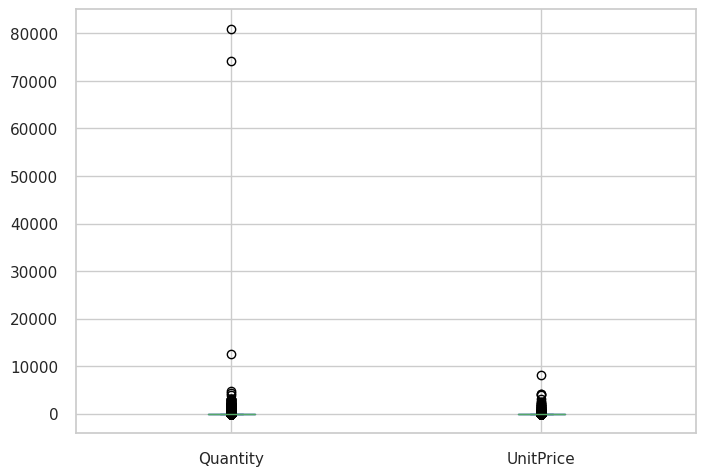

In [ ]:
#Verificando Outliers

df[['Quantity','UnitPrice']].plot.box()

<Axes: >

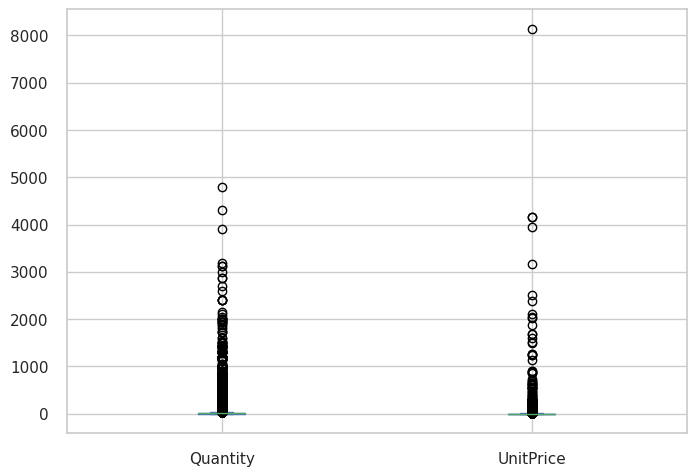

In [ ]:
df.query('Quantity<10_000')[['Quantity','UnitPrice']].plot.box()

In [ ]:
#Removendo Outliers
df = df.query('Quantity<10_000 & UnitPrice<8_000').copy()

In [ ]:
#Criando a coluna de Preço Total
df['price_total'] = df.Quantity * df.UnitPrice
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
pd.Timestamp.today()

pd.Timestamp('2012-01-01')



Timestamp('2012-01-01 00:00:00')

In [ ]:
#Calculando RFV

df_rfv = (
  df.groupby('CustomerID')
  .agg(
      R = ('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days),
      F = ('InvoiceNo', 'nunique'),
      V = ('price_total', 'mean')
  )
)

df_rfv

,R,F,V
CustomerID,,,
12347,24,7,23.681319
12348,97,4,57.975484
12349,40,1,24.076027
12350,332,1,19.670588
12352,58,8,29.482824
...,...,...,...
18280,299,1,18.060000
18281,202,1,11.545714
18282,29,2,14.837500


<Axes: >

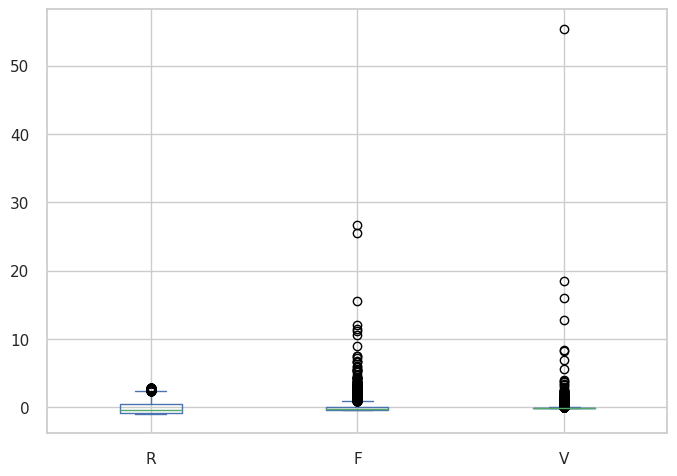

In [ ]:
#Tratando Outliers
df_rfv.apply(scale).plot.box()

In [ ]:
df_rfv.apply(scale).query('V>50')

,R,F,V
CustomerID,,,
15098,0.899878,-0.16523,55.442267


In [ ]:
df_rfv = df_rfv.drop(15098)

<Axes: >

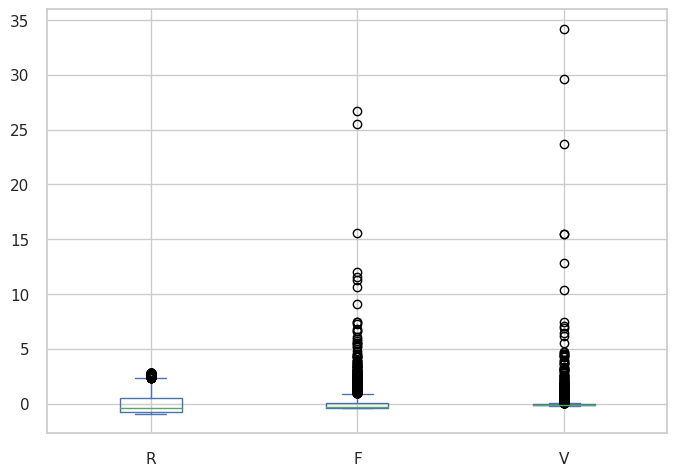

In [ ]:
df_rfv.apply(scale).plot.box()

In [ ]:
# Normalizar os dados

scaler = PowerTransformer()

df_rfv_scaled = pd.DataFrame(scaler.fit_transform(df_rfv), index=df_rfv.index, columns=df_rfv.columns)
df_rfv_scaled

,R,F,V
CustomerID,,,
12347,-1.563219,1.201760,0.407306
12348,0.323470,0.660559,1.331556
12349,-0.809134,-1.158055,0.426389
12350,1.568467,-1.158055,0.187729
12352,-0.307718,1.309570,0.653941
...,...,...,...
18280,1.475652,-1.158055,0.083327
18281,1.107356,-1.158055,-0.497104
18282,-1.275046,-0.195781,-0.164772


<Axes: >

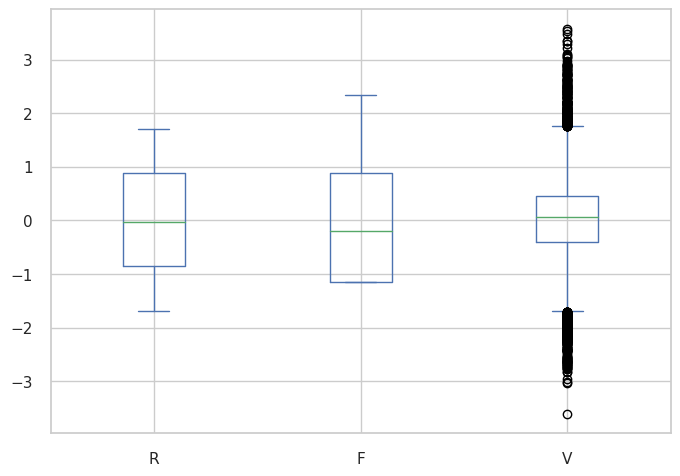

In [ ]:
df_rfv_scaled.plot.box()

In [ ]:
scaler.inverse_transform(df_rfv_scaled)

array([[24.        ,  7.        , 23.68131868],
       [97.        ,  4.        , 57.97548387],
       [40.        ,  1.        , 24.0760274 ],
       ...,
       [29.        ,  2.        , 14.8375    ],
       [25.        , 16.        ,  2.83707351],
       [64.        ,  3.        , 26.24685714]])

In [ ]:
df_rfv.describe()

,R,F,V
count,4336.000000,4336.000000,4336.000000
mean,114.032288,4.273293,34.554131
std,99.968352,7.706154,129.143523
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.381225
50%,72.000000,2.000000,17.728162
75%,163.250000,5.000000,24.849458
max,395.000000,210.000000,4453.430000


In [ ]:
df_rfv_clip = df_rfv.apply(lambda x: x.clip(upper=x.quantile(.95)))
df_rfv_clip.describe()

df_rfv_clip_scaled = df_rfv_clip.apply(scale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

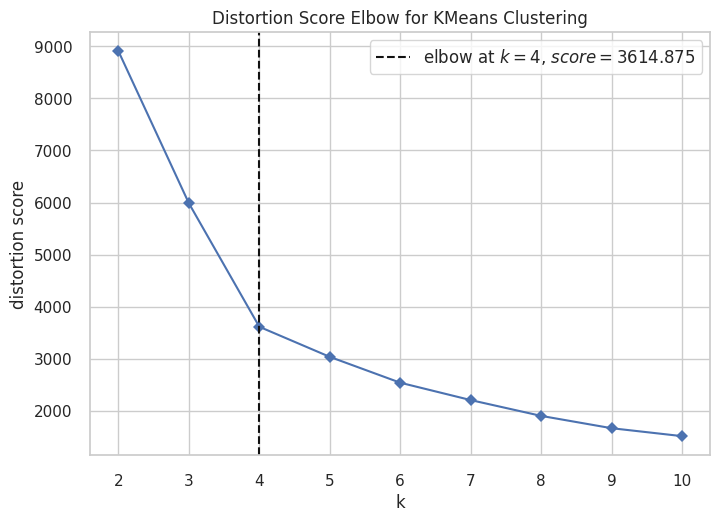

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [ ]:
#Definindo a quantidade de clusters com Kelbow

kelbow_visualizer(KMeans(), df_rfv_clip_scaled, k=10, timings=False)

In [ ]:
# Criando um dicionário

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfv_clip_scaled.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,8906.615147,0.382384,1.065337,1995.757617
3,5986.661885,0.435520,0.857427,2540.936722
4,3614.888869,0.479627,0.704401,3752.183493
5,3037.477427,0.484990,0.737613,3554.127916
6,2541.164955,0.398325,0.850891,3566.977867
7,2225.169187,0.384531,0.847923,3496.357460
8,1904.226426,0.383868,0.869095,3605.310528
9,1667.837891,0.394005,0.801404,3677.581745
10,1515.551360,0.351849,0.887767,3644.912730


In [ ]:
#Implementando Kmeans com os clusters indicados

kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_rfv_clip_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
px.scatter_3d(df_rfv_clip, x='R', y='F', z='V', color=kmeans_labels.astype(str), template='plotly_dark')

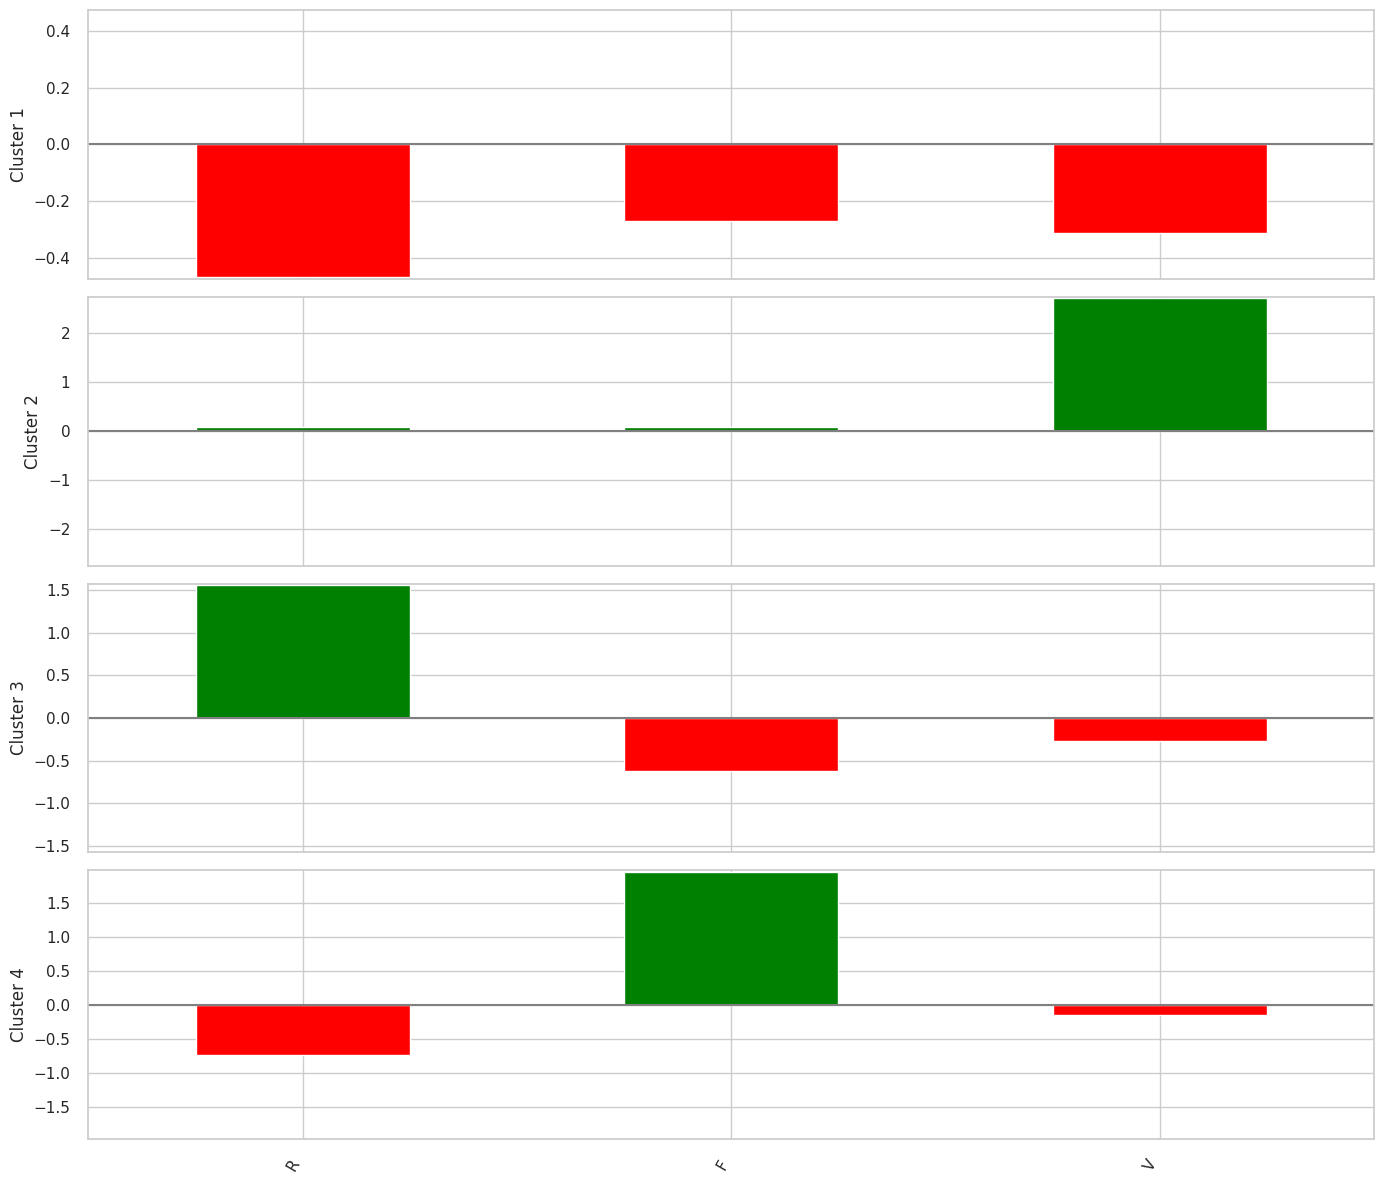

In [ ]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_rfv_clip_scaled.columns)

fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Perfil de Compra em cada Cluster

  (
  df_rfv_clip.assign(cluster=kmeans_labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2,3
R,67.523221,121.057935,261.082051,41.517018
F,2.704303,3.876574,1.509744,10.191248
V,17.152381,80.703756,18.119828,20.461801


Justificativa:

O presente modelo da uma visão do comportamento dos tipos de clientes da empresa, permitindo que a empresa tome as melhores decisões baseadas em dados para atender os clientes e melhorar seu desempenho.


Resultado:

Cluster 0 = clientes com recência, frequência e valor baixo. Neste caso a empresa poderia fazer campanhas com descontos para clientes já cadastrados na loja.

Cluster 1 = clientes dom recência média, frequência baixa e valor alto. A empresa pode investir em campanhas de benefícios a partir de um valor de compra incentivando uma frequência maior.

Cluster 2 = Clientes com recência alta, frequência baixa e valor baixo. Incentivar a recompra de novos clientes.

Cluster 3 = Clientes com Recência baixa, frequência alta e valor baixo. Investir em campanhas de Upsell.